In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
mps_device = torch.device("cuda:1")
from constants.filepath import PROJECT_PATH
%matplotlib widget

In [3]:
residuals = np.load(os.path.join(PROJECT_PATH, 'model_data', 'training_residuals.npz'))['residuals']
command_data = np.load(os.path.join(PROJECT_PATH, 'model_data', 'training_command_data.npz'))['command_data']
analytical_data = np.load(os.path.join(PROJECT_PATH, 'model_data', 'training_analytical_data.npz'))['analytical_data']

test_residuals = np.load(os.path.join(PROJECT_PATH, 'model_data', 'test_residuals.npz'))['residuals']
test_command = np.load(os.path.join(PROJECT_PATH, 'model_data', 'test_command_data.npz'))['command_data']
test_analytical = np.load(os.path.join(PROJECT_PATH, 'model_data', 'test_analytical_data.npz'))['analytical_data']


input_data = np.stack((command_data, analytical_data), axis=1)
# input_features = torch.tensor(analytical_data, dtype=torch.float32, device=mps_device).view(-1, 1)
input_features = torch.tensor(input_data, dtype=torch.float32, device='cpu')
target_residuals = torch.tensor(residuals, dtype=torch.float32, device='cpu').view(-1, 1)

test_input_data = np.stack((test_command, test_analytical), axis=1)
test_input_features = torch.tensor(test_input_data, dtype=torch.float32, device='cpu')
test_target_residuals = torch.tensor(test_residuals, dtype=torch.float32, device='cpu').view(-1, 1)

print("input_features shape:", input_features.shape)
print("target_residuals shape:", target_residuals.shape)

input_features shape: torch.Size([2338665, 2])
target_residuals shape: torch.Size([2338665, 1])


In [4]:
input_100 = input_features[:100]
target_100 = target_residuals[:100]

test_input_100 = test_input_features[:100]
test_target_100 = test_target_residuals[:100]

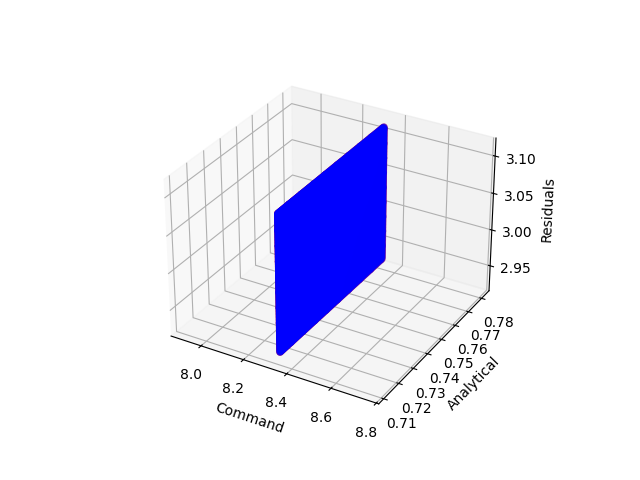

In [5]:
# 3d plot in matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(input_100[:, 0], input_100[:, 1], target_100, c='r', marker='o')
ax.scatter(test_input_100[:, 0], test_input_100[:, 1], test_target_100, c='b', marker='o')
ax.set_xlabel('Command')
ax.set_ylabel('Analytical')
ax.set_zlabel('Residuals')
plt.show()